<a href="https://colab.research.google.com/github/Ali-Banihashemi/VGG16-ResNet50-GANs-and-Transfer-Learning/blob/main/AI-Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence Course- 2024**

# **Project 1**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Part I**

So, First we may have a quick look on CNNs' basics to understand VGG16 and ResNet50 better.

Generally CNN(Convolutional neural network) is a neural network which use covolution to process mostly pictures as input.

Basicaly, convolution is sliding some Kernel(Filter) over an image, multiply the numbers in that kernel with values that are stored on that specific part of the image and sum the result. Take a look at this picture for better understanding:

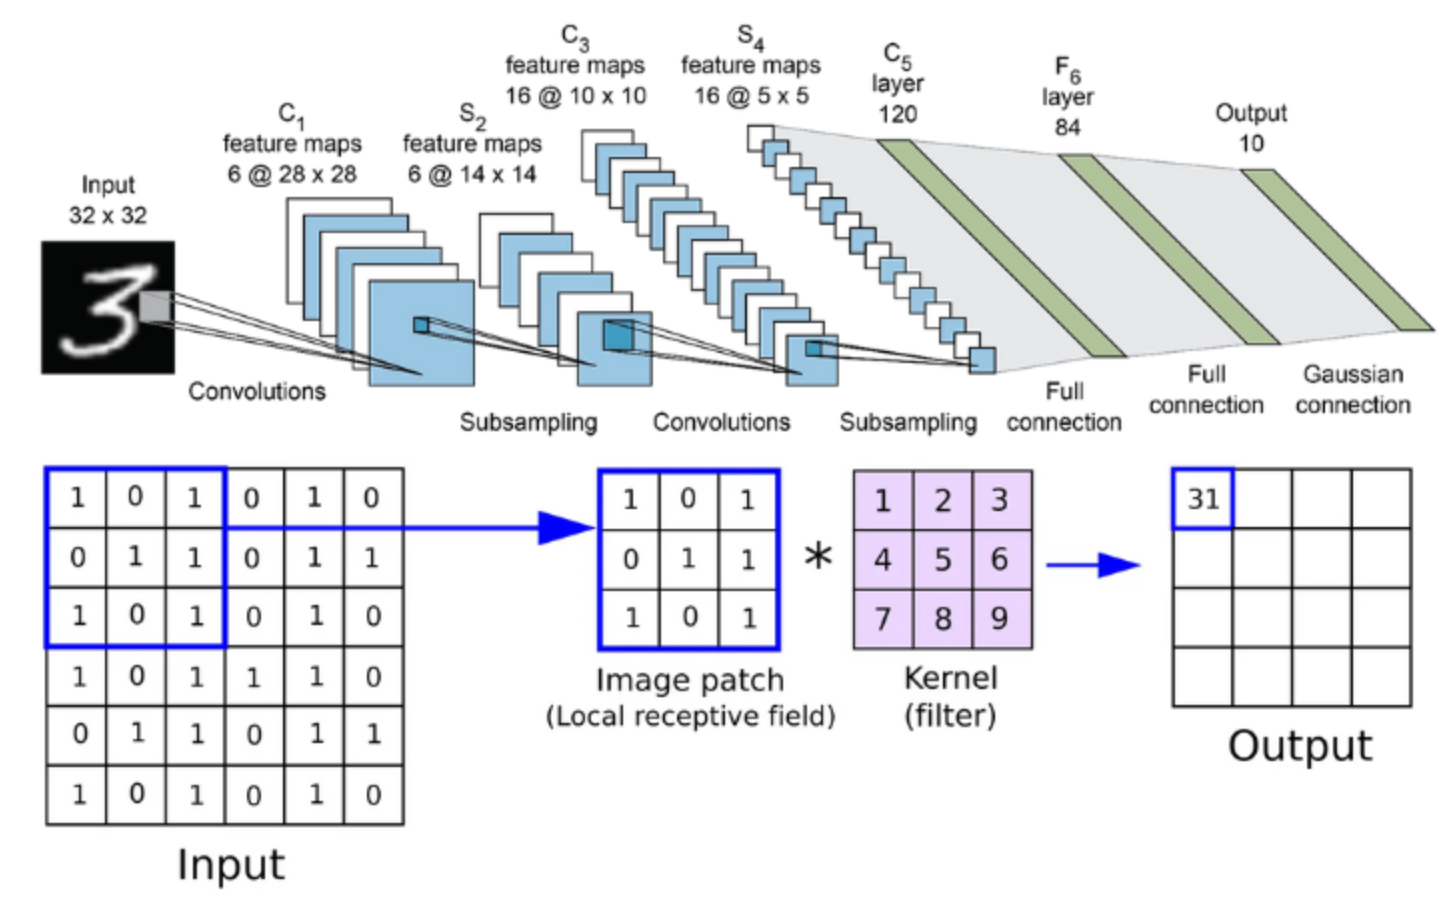

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/AI-Project1/Convolution.png',width=500,height=400)

***Picture1***

After this process we use pooling to reduce the size of the input image. As you can see the information of some pixels(number of pixels is related to size of the kernel) is combined into one pixel in the output so we can use a pooling function to reduce the size of output and only keep the important pixels.As you can see in the top part of picture1 , this process reduces the size of images in each layer although number of them is increasing. That's because in CNNs we may have multiple filters in one layer and we keep reducing the size of images as the number of images is increasing so our data does'nt go so large.

And to understand pooling better there are several pooling techniques which as an example in the Max-Pooling technique we choose the maximum value in a specific number of pixels(this number is called strides) to represent those pixels.In the following picture stride is equal to 2, which means we devide our input into some 2*2 squares then we find maximum value in each square. This way our picture dimentions will be devided by 2.

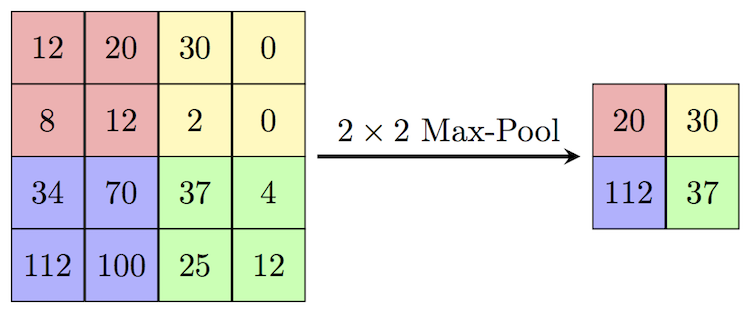

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/Maxpool.png',width=400,height=200)

Knowing basics of the CNNs we may start talking about VGG16 and Resnet50.

**VGG16**

VGG16 is a CNN. The number 16 represent that there are 16 weighted layers in the architecture of this model. VGG16 uses convolution layers with a 3x3 filter and a stride 1 that are in the same padding and maxpool layer of 2x2 filter of stride 2.
So let's take a look at it's architecture.

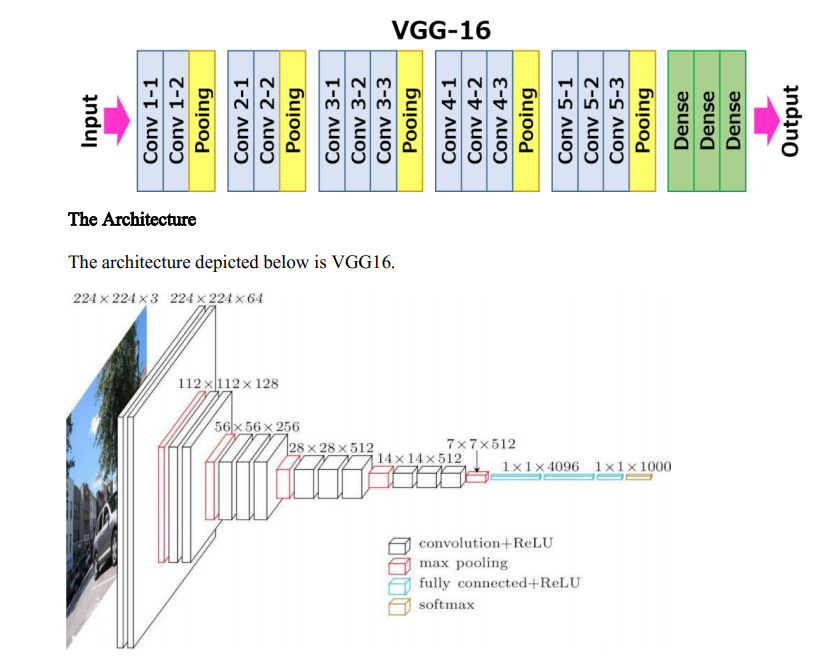

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/VGG16.png',width=500,height=400)

In VGG16 we always get a 224*224 RGB image as the input. We first perform 2 consecutive convolutions on the input and then we will have a pooling (max pooling) layer which will reduces the size of our images. As you can see the depth of our layers is getting bigger as we move forward and that's because there are more than one filter in each layer as we discussed and the depth is actually the number of these filters. After the pooling we continue with the next layers until we reach the Fully connected(Dense) layers and as you can see in those layers the size of the pictures are already recuded to a 1 by 1 by flattening and only thing left is the depth.

Calculating all the prameters in this model we found that it has more than 130 million parameters which is one of it's disadvantages.


**ResNet50**

ResNet50 is a CNN as well. The basics of this CNN is pretty much the same as VGG16 but there is a huge improvement. You know in an architecture like VGG16 we have small number of layers and we can't increase that if we want as well. The reason is the vanishing gradients. "Vanishing gradients is a problem that occurs when training deep neural networks, where the gradients of the parameters in the deeper layers become very small, making it difficult for those layers to learn and improve. This problem becomes more pronounced as the network becomes deeper." So how we can increase our layers.
ResNet or residual network solved this problem. Basically there are several skip connections in this CNN which will feed deeper layers with the actual input by skipping some of the layers. This way vanishing gradients will never occur and we can have more than 150 layers in our model. Additionally Resnet uses less filters in each layer than VGG16 does so it gets faster as well. ResNet50 has around 30 million parameters which is far less than VGG16 parameters.
There are reports that shows ResNet is more accurate than VGG16 generally although choosing one depends on the situation as always.

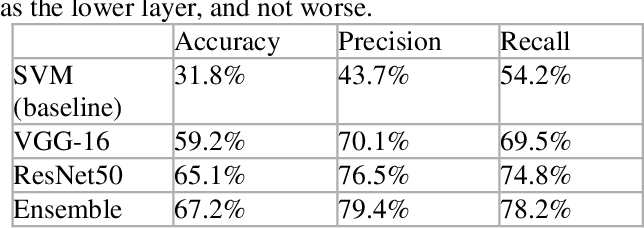

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/ResVSVGG.png',width=500,height=200
      )

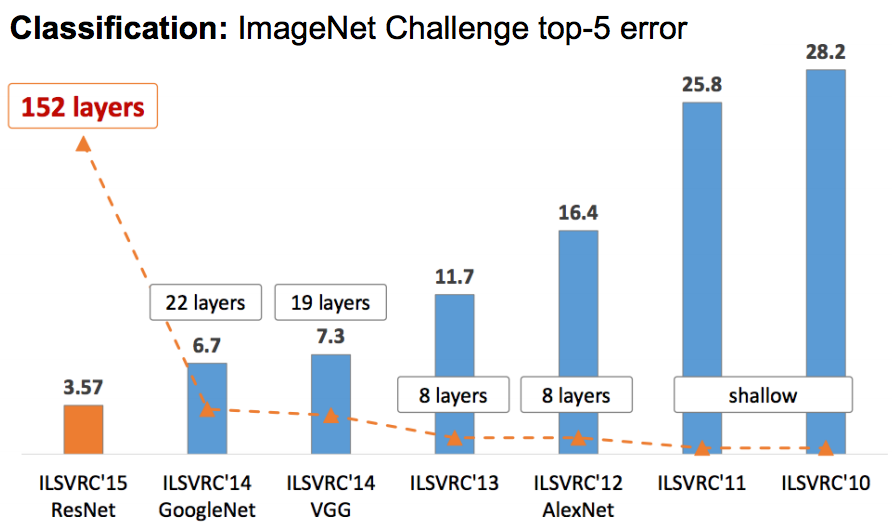

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/ResVSVGG2.png',width=500,height=400)

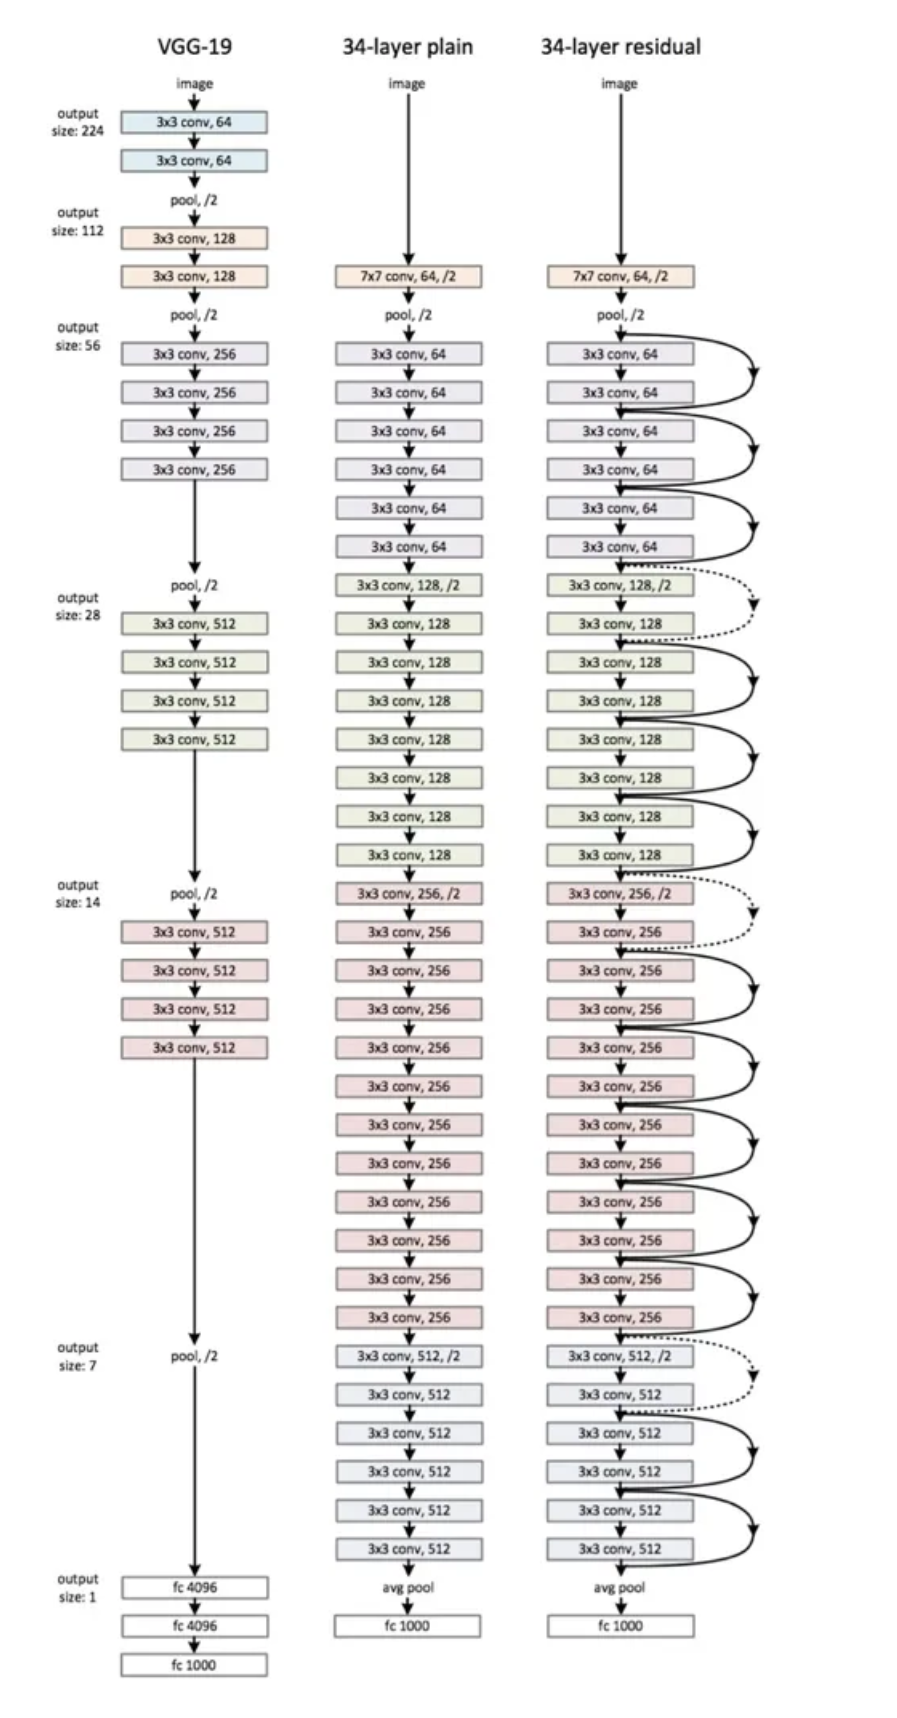

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/ResNet.png',width=500,height=800)

As you can see in the residual networks, after several convolutional layers we have an skip coonection which is getting feed from some layers behind it. This kind of behaviour help us strengthen the model against Vanishing gradients.

Describing the architecture itself there are two main blocks:

Convolutional blocks are in charge of convolving input in order to extract features.A convolutional block typically consists of three convolutional layers, each followed by batch normalization and a ReLU activation function.

Identity blocks is used to skip some layers and create connections which helps us build deeper neural networks. In these blocks there is no convolution in the skip connection and the input will skip some layers in it's way.


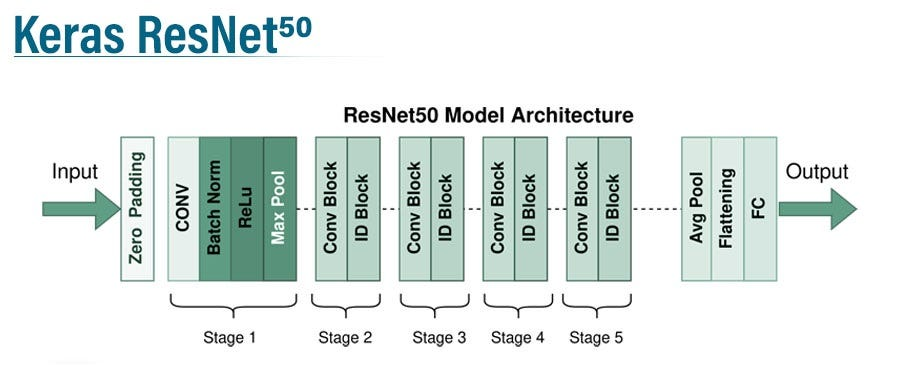

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/ResNet2.jpg',width=500,height=250)

As shown above, Input will be preprocessed using convolution , Batch normalization and ... and then it will be ready for next stages which include convolutional and identity blocks in order.

**Implementation**

So Let's begin implementing VGG16 model to classify skin diseases:
We use the picture of VGG16 structure as a map to build our model.

1:Imports


In [ ]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense

2:Constructing model based on our VGG16 map

In [ ]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation = "relu",input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation = "relu"))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096,activation="relu"))
model.add(Dense(4096,activation="relu"))
model.add(Dense(3,activation="softmax"))

model.build()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

So, we built a VGG16 model from scratch and it is now trainable.However, as we discuss there are more than 130 million parameters in this model and it's going to be very time consuming to train this model. After implementing this model and knowing what's atually happening under the hood we may continue with a pretrained model and use a concept known as "Transfer Learning".

It is obvious that learning how to ride a motorcycle is easier when you have already learned how to ride a bike. Transfer learning uses same concept. Defining 130 million parameters from scratch gonna be so time consuming so we load a pretrained model that has these parameters and train it again to satisfy our goals. This way it gonna be much quicker training.

1: imports

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import os
import pandas as pd

2: use os.listdir as way to find our classes

In [ ]:
dataset_path = os.listdir('/content/drive/MyDrive/AI-Project1/Skin_Diseases')


diseases = os.listdir('/content/drive/MyDrive/AI-Project1/Skin_Diseases')

3: for each folder we have a class and we load all the files in that folder to our dataset and the label is the name of that folder

In [ ]:
dataset = []

for item in diseases:

 all_types = os.listdir('/content/drive/MyDrive/AI-Project1/Skin_Diseases' + '/' +item)



 for img in all_types:
    dataset.append((item, str('/content/drive/MyDrive/AI-Project1/Skin_Diseases' + '/' +item) + '/' + img))



4: construct a dataframe

In [ ]:
diseases_df = pd.DataFrame(data=dataset, columns=['Disease', 'image'])

5: using cv2 library we resize all the images and load them in images list

In [ ]:
import cv2
path = '/content/drive/MyDrive/AI-Project1/Skin_Diseases/'
im_size = 224

images = []
labels = []

for i in diseases:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)

        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [ ]:
images = np.array(images)
images.shape

images = images.astype('float32') / 255.0

6: we use label encoding and one hot encoding to basicaly turning labels and attributes to numbers instead of words.

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=diseases_df['Disease'].values


y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)


y=y.reshape(-1,1)
onehotencoder=OneHotEncoder(categories='auto', sparse=False)

Y= onehotencoder.fit_transform(y)
Y.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(173, 3)

7: constructing training and validation set

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(images, Y, test_size=0.30, random_state=42)


8: we build our model using VGG16 pretrained model

In [ ]:
from keras import optimizers


IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model2 = Model(inputs=vgg.input, outputs=prediction)
model2_1 = Model(inputs=vgg.input, outputs=prediction)
model2.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

9: compiling and fitting without data agumentation

In [ ]:
adam = optimizers.Adam()
model2.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])
model2_1.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
model_history=model2.fit(X_train, y_train, batch_size=3, epochs=6, verbose=1, validation_data=(X_valid, y_valid))
#model got overtrained using 10 epochs so we are now using 6

Epoch 1/6
41/41 [==============================] - 119s 3s/step - loss: 0.7116 - accuracy: 0.4959 - val_loss: 0.6079 - val_accuracy: 0.5962
Epoch 2/6
41/41 [==============================] - 117s 3s/step - loss: 0.3559 - accuracy: 0.7190 - val_loss: 0.5150 - val_accuracy: 0.5385
Epoch 3/6
41/41 [==============================] - 111s 3s/step - loss: 0.2596 - accuracy: 0.8926 - val_loss: 0.4687 - val_accuracy: 0.6923
Epoch 4/6
41/41 [==============================] - 116s 3s/step - loss: 0.2114 - accuracy: 0.9008 - val_loss: 0.3701 - val_accuracy: 0.7500
Epoch 5/6
41/41 [==============================] - 110s 3s/step - loss: 0.1597 - accuracy: 0.9256 - val_loss: 0.4437 - val_accuracy: 0.7115
Epoch 6/6
41/41 [==============================] - 124s 3s/step - loss: 0.1800 - accuracy: 0.9339 - val_loss: 0.4407 - val_accuracy: 0.7308


We got validation accuracy about 70 percent without any augmentation.

Using imagedatagenerator we generate new samples and train our model

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI-Project1/Skin_Diseases/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

model2_1.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model_history=model2_1.fit(
  train_set,
  epochs=10,
  steps_per_epoch=12,verbose=1)


Found 173 images belonging to 3 classes.
Epoch 1/10
 6/12 [==============>...............] - ETA: 1:52 - loss: 7.6813 - accuracy: 0.5260

12/12 [==============================] - 120s 9s/step - loss: 7.6813 - accuracy: 0.5260


evaluating the data augmented model accuracy

In [ ]:
model2_1.evaluate(X_valid, y_valid, batch_size=10)

6/6 [==============================] - 33s 5s/step - loss: 0.6649 - accuracy: 0.6923


[0.6648842096328735, 0.692307710647583]

Now Let's implement ResNet50 model.

As done in VGG16 part let's take a look on how we can build a ResNet50 from scratch and then we will move on a pretrained model.

In [ ]:
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.initializers import glorot_uniform
from keras.models import Model

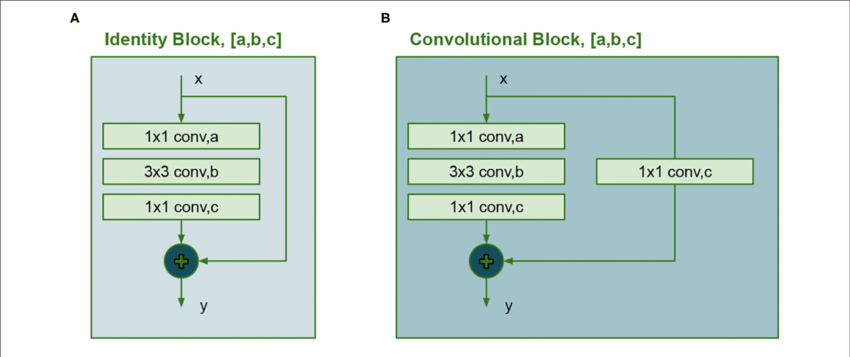

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/ResNetBlock.png',width=500,height=250)

In [ ]:
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
    #source = Dr.Khoshnevisan course codes

In [ ]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
    #source = Dr.Khoshnevisan course codes

In [ ]:
def ResNet50(input_shape=(224, 224, 3), classes=3):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D((2,2), name="avg_pool")(X)

    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)

    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model3 = ResNet50(input_shape = (224, 224, 3), classes = 3)

In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1[0][0]']        

So now we know the details of ResNet50 implementation let's continue with the pretrained resnet model.

1: import

In [ ]:
from keras.applications import ResNet50

2: creating model

In [ ]:
pretrained = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in pretrained.layers:
  layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(pretrained.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

In [ ]:
model4 = Model(inputs=pretrained.input, outputs=output)
model4_1 = Model(inputs=pretrained.input, outputs=output)

3 :compiling model

In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

4: using an imagedatagenerator with no change on our data to test the model without augmentation

In [ ]:
no_augmentation = ImageDataGenerator(
    rescale=1./255
    )

In [ ]:
train_set = no_augmentation.flow_from_directory(
    '/content/drive/MyDrive/AI-Project1/Skin_Diseases/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 173 images belonging to 3 classes.


5: fitting the model

In [ ]:
model4.fit(train_set, epochs=6, steps_per_epoch=len(train_set),verbose=1)

Epoch 1/6
6/6 [==============================] - 58s 7s/step - loss: 8.9486 - accuracy: 0.3699
Epoch 2/6
6/6 [==============================] - 47s 6s/step - loss: 3.7168 - accuracy: 0.3873
Epoch 3/6
6/6 [==============================] - 43s 7s/step - loss: 2.1317 - accuracy: 0.3699
Epoch 4/6
6/6 [==============================] - 42s 6s/step - loss: 2.2173 - accuracy: 0.3295
Epoch 5/6
6/6 [==============================] - 39s 7s/step - loss: 1.6670 - accuracy: 0.4104
Epoch 6/6
6/6 [==============================] - 41s 6s/step - loss: 1.7839 - accuracy: 0.2948


6: evaluating accuracy

In [ ]:
model4.evaluate(X_valid, y_valid, batch_size=3)

18/18 [==============================] - 12s 599ms/step - loss: 1.3977 - accuracy: 0.4808


[1.3976775407791138, 0.48076921701431274]

Here we use same augmentation as last part for our data

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


train_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/AI-Project1/Skin_Diseases/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

model4_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 173 images belonging to 3 classes.


In [ ]:
model4_1.fit(train_set, epochs=6, steps_per_epoch=len(train_set),verbose=1)

Epoch 1/6
6/6 [==============================] - 48s 7s/step - loss: 14.9423 - accuracy: 0.4104
Epoch 2/6
6/6 [==============================] - 47s 7s/step - loss: 5.9713 - accuracy: 0.5954
Epoch 3/6
6/6 [==============================] - 44s 7s/step - loss: 2.4500 - accuracy: 0.7225
Epoch 4/6
6/6 [==============================] - 45s 7s/step - loss: 1.3740 - accuracy: 0.7746
Epoch 5/6
6/6 [==============================] - 45s 7s/step - loss: 1.3226 - accuracy: 0.8497
Epoch 6/6
6/6 [==============================] - 52s 7s/step - loss: 0.8341 - accuracy: 0.8497


Advantages and Disadvantages of data augmentation

Advantages:

First of all data augmentation is a tool to increase the size of dataset which can really help with small datasets.

It also helps to have more accurate models as some transformations like rotation or scaling should not change the classifier dicision in problems like skin diseases.

At last on important advantage of data augmentation is that it prevent overfitting as it increases the dataset and does not allow our model to memorize datas.

Disadvantages:

This method can sometimes lead to a false data. For instance a '6' can turn into a '9' by flipping it or a 'p' can turn into a 'q'. So we should use data augmentation carefully.

It can increase data processing cost and also it introduce noise to the data oftenly.

## **Part II**

What is GAN?

Generative Adversarial Networks are models which include two neural networks. As the word 'Adversarial' these two networks will compete with each other and this process leads to the model getting better and better.

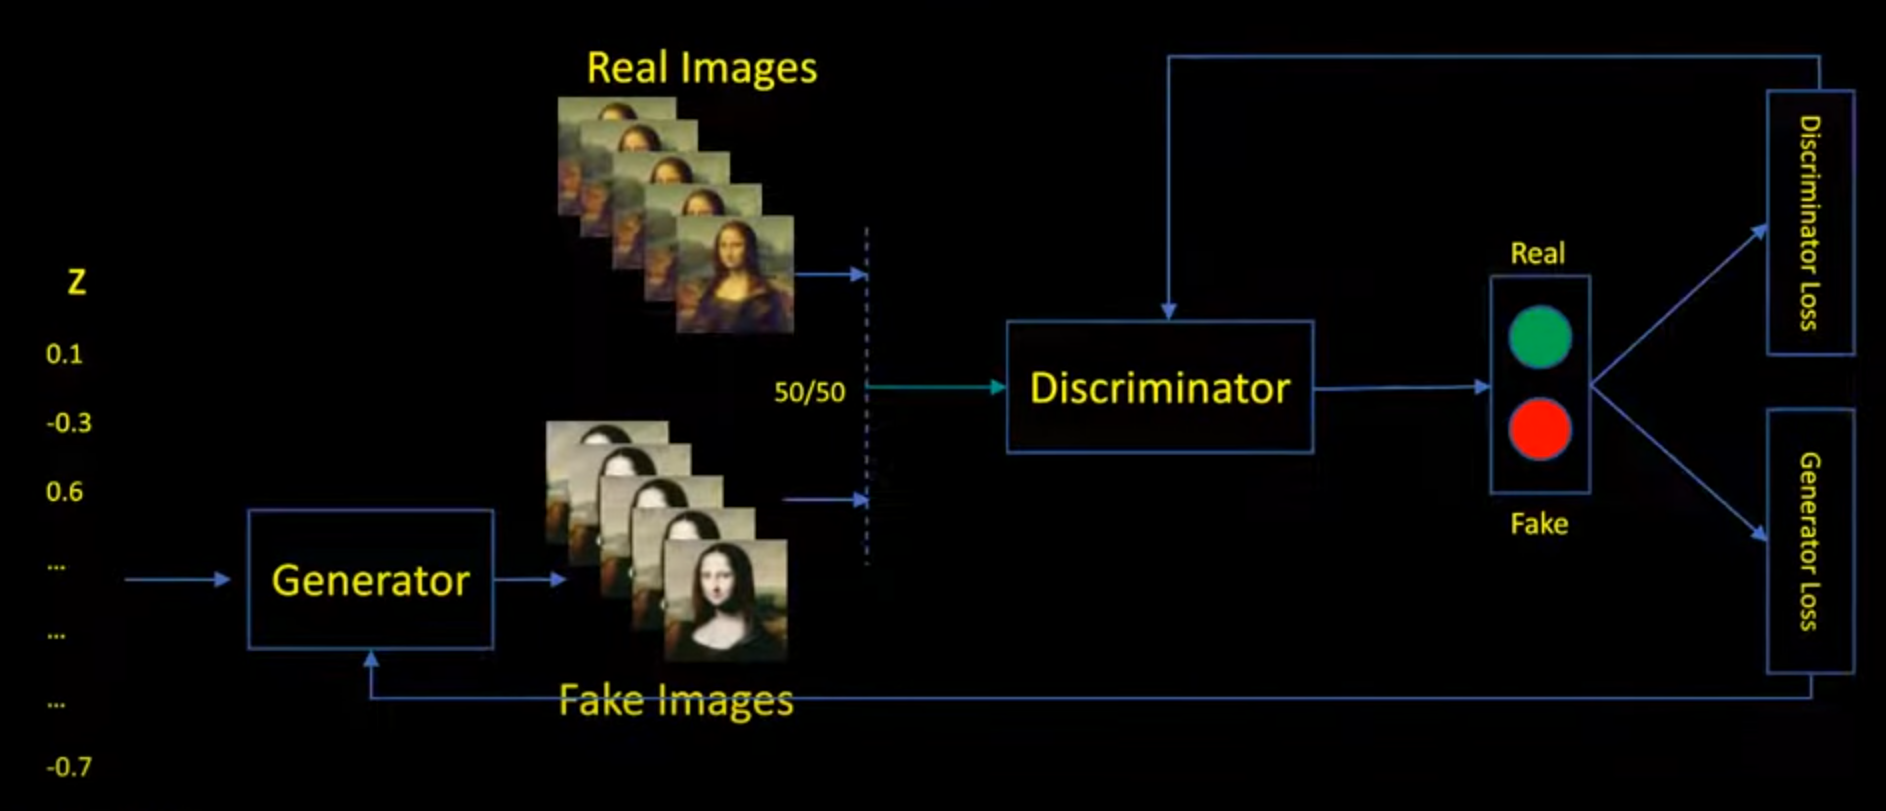

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/GAN.png',width=500,height=300)

There are two main parts in a GAN. A generator which generate fake images and it is trying to fool the discriminator to think it's a real image. And a discriminator which we have trained with real images and it's job is to find the fake images. So in this process quality of the pictures which are generated by the generator will increase to the degree that dicriminator thinks they are actual images.

Let's get into the implementation.

1: imports

In [ ]:
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot as plt

2: checking imported dataset

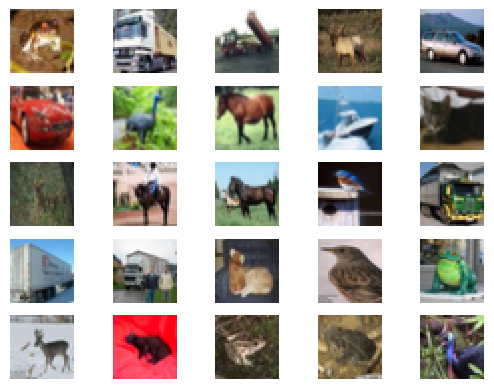

In [ ]:
(trainX, trainy), (testX, testy) = load_data()

# plot 25 images
for i in range(25):
	plt.subplot(5, 5, 1 + i)
	plt.axis('off')
	plt.imshow(trainX[i])
plt.show()


3: Defining discriminator , it's just a normal image classifier as we saw in the last part. It classifies images in two classes(real or fake).

In [ ]:
def define_discriminator(in_shape=(32,32,3)):
	model = Sequential()

	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [ ]:
test_discr = define_discriminator()
print(test_discr.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_4 (Dropout)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                

4: Defining generator, it's actually reverse of what we did in classifiers. Having a 1D vector latent_dim we upsample it until we reach a 32 by 32 image.

In [ ]:
def define_generator(latent_dim):
	model = Sequential()

	n_nodes = 128 * 8 * 8
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((8, 8, 128)))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	model.add(Conv2D(3, (8,8), activation='tanh', padding='same'))
	return model

In [ ]:
test_gen = define_generator(100)
print(test_gen.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 8192)              0         
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                                      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_5 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

5:Defining Gan, its just connecting generator and discriminator together. In training GAN we just improve generator and we train discriminator some where else.

In [ ]:
def define_gan(generator, discriminator):
	discriminator.trainable = False

	model = Sequential()
	model.add(generator)
	model.add(discriminator)

	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

6: Defining a function to load our dataset and convert them

In [ ]:
def load_real_samples():
	(trainX, _), (_, _) = load_data()
	X = trainX.astype('float32')
	X = (X - 127.5) / 127.5

	return X

7:This function get's a number and give us some random samples from dataset.

In [ ]:
def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = ones((n_samples, 1))
	return X, y

8:As we had latent_dim as a input for the generator we generate some latents here.

In [ ]:
def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

9:We generate fake samples by first generating some random latent_dim and inputing it to the generator. Labels are all zeros as they are all fake

In [ ]:
def generate_fake_samples(generator, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = generator.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y

10:As it's not that simple we can not train our model using fit so we define our own training function.

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)

	for i in range(n_epochs):
		for j in range(bat_per_epo):


			X_real, y_real = generate_real_samples(dataset, half_batch)
			d_loss_real, _ = d_model.train_on_batch(X_real, y_real)

			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			d_loss_fake, _ = d_model.train_on_batch(X_fake, y_fake)


			X_gan = generate_latent_points(latent_dim, n_batch)
			y_gan = ones((n_batch, 1))

			g_loss = gan_model.train_on_batch(X_gan, y_gan)

			print('Epoch>%d, Batch %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss_real, d_loss_fake, g_loss))

	g_model.save('/content/drive/MyDrive/AI-Project1/GAN', save_format="h5")

11: Using our predefined models we create an actual model and train it.

In [ ]:
latent_dim = 100
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
dataset = load_real_samples()
train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=2)

2/2 [==============================] - 1s 327ms/step
Epoch>1, Batch 1/390, d1=0.688, d2=0.708 g=0.685
2/2 [==============================] - 1s 588ms/step
Epoch>1, Batch 2/390, d1=0.415, d2=0.894 g=0.598
2/2 [==============================] - 2s 827ms/step
Epoch>1, Batch 3/390, d1=0.256, d2=1.405 g=0.586
2/2 [==============================] - 2s 926ms/step
Epoch>1, Batch 4/390, d1=0.227, d2=0.794 g=1.349
2/2 [==============================] - 1s 741ms/step
Epoch>1, Batch 5/390, d1=0.264, d2=0.326 g=1.748
2/2 [==============================] - 1s 599ms/step
Epoch>1, Batch 6/390, d1=0.205, d2=0.531 g=0.961
2/2 [==============================] - 1s 329ms/step
Epoch>1, Batch 7/390, d1=0.298, d2=0.871 g=0.673
2/2 [==============================] - 1s 310ms/step
Epoch>1, Batch 8/390, d1=0.280, d2=1.984 g=0.433
2/2 [==============================] - 1s 599ms/step
Epoch>1, Batch 9/390, d1=0.237, d2=2.264 g=0.665
2/2 [==============================] - 1s 587ms/step
Epoch>1, Batch 10/390, d1=0.3

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch>2, Batch 390/390, d1=0.704, d2=0.674 g=0.821


Now let's just use our model to generate some images:

1/1 [==============================] - 1s 959ms/step


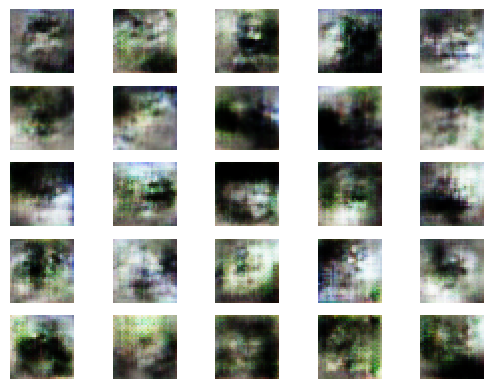

In [ ]:
from keras.models import load_model
from numpy.random import randn


def show_plot(examples, n):
	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		plt.axis('off')
		plt.imshow(examples[i, :, :, :])
	plt.show()

model = generator
latent_points = generate_latent_points(100, 25)
X = model.predict(latent_points)
X = (X + 1) / 2.0

import numpy as np
X = (X*255).astype(np.uint8)

show_plot(X, 5)


This results was achieved using only 2 epochs. 2 epochs were as long as 2.5 hours on google colab. If we want to have a much more accurate model we should let our model to have that 100 epochs.

**Gradient Ascent**

In GANs our focus is on maximizing the probability of discriminator being wrong and this means our generator is generating good images. Using gradient descent in this case may cause some problem.

We know in GANs the generator and discriminator are trained simultaneously. This can lead to having many local minimas and therefore using gradient descent in this case may cause difficulties. Another problem which is known as Mode collapse can occur when the generator collapses to producing limited samples that fool the discriminator, leading to poor diversity in generated samples.

One of the most important problems in this case is Vanishing Gradients. In the early stages discriminator can defeat generator in a way that it prevents convergence.

As an example we can have same problem in the last part. An easy implementation of gradient ascent is actually reversing the loss and try to minimize the loss function again. This way we are using a gradient ascent optimization without having to make another optimizer and using our last optimizer.

In [ ]:
from keras.losses import MSE,MeanSquaredError

In [ ]:
def positive_mse(y_true, y_pred):
    return -1 * MSE(y_true, y_pred)

In [ ]:
opt = Adam(lr=0.0002, beta_1=0.5)
model.compile(loss=positive_mse,
          optimizer=opt,
          metrics=[MeanSquaredError()])

In the last part of defining the GAN (part 5) we can use the above code to compile the model using gradient ascent.


## **Part III**

First we should make some of the first layers of the pretrained model untrainable. The actual number is related on how small our dataset really is. After that we should fine tune our last layers specially the top layers and we should be mindful about overfitting as well , so we can use data augmentation here.

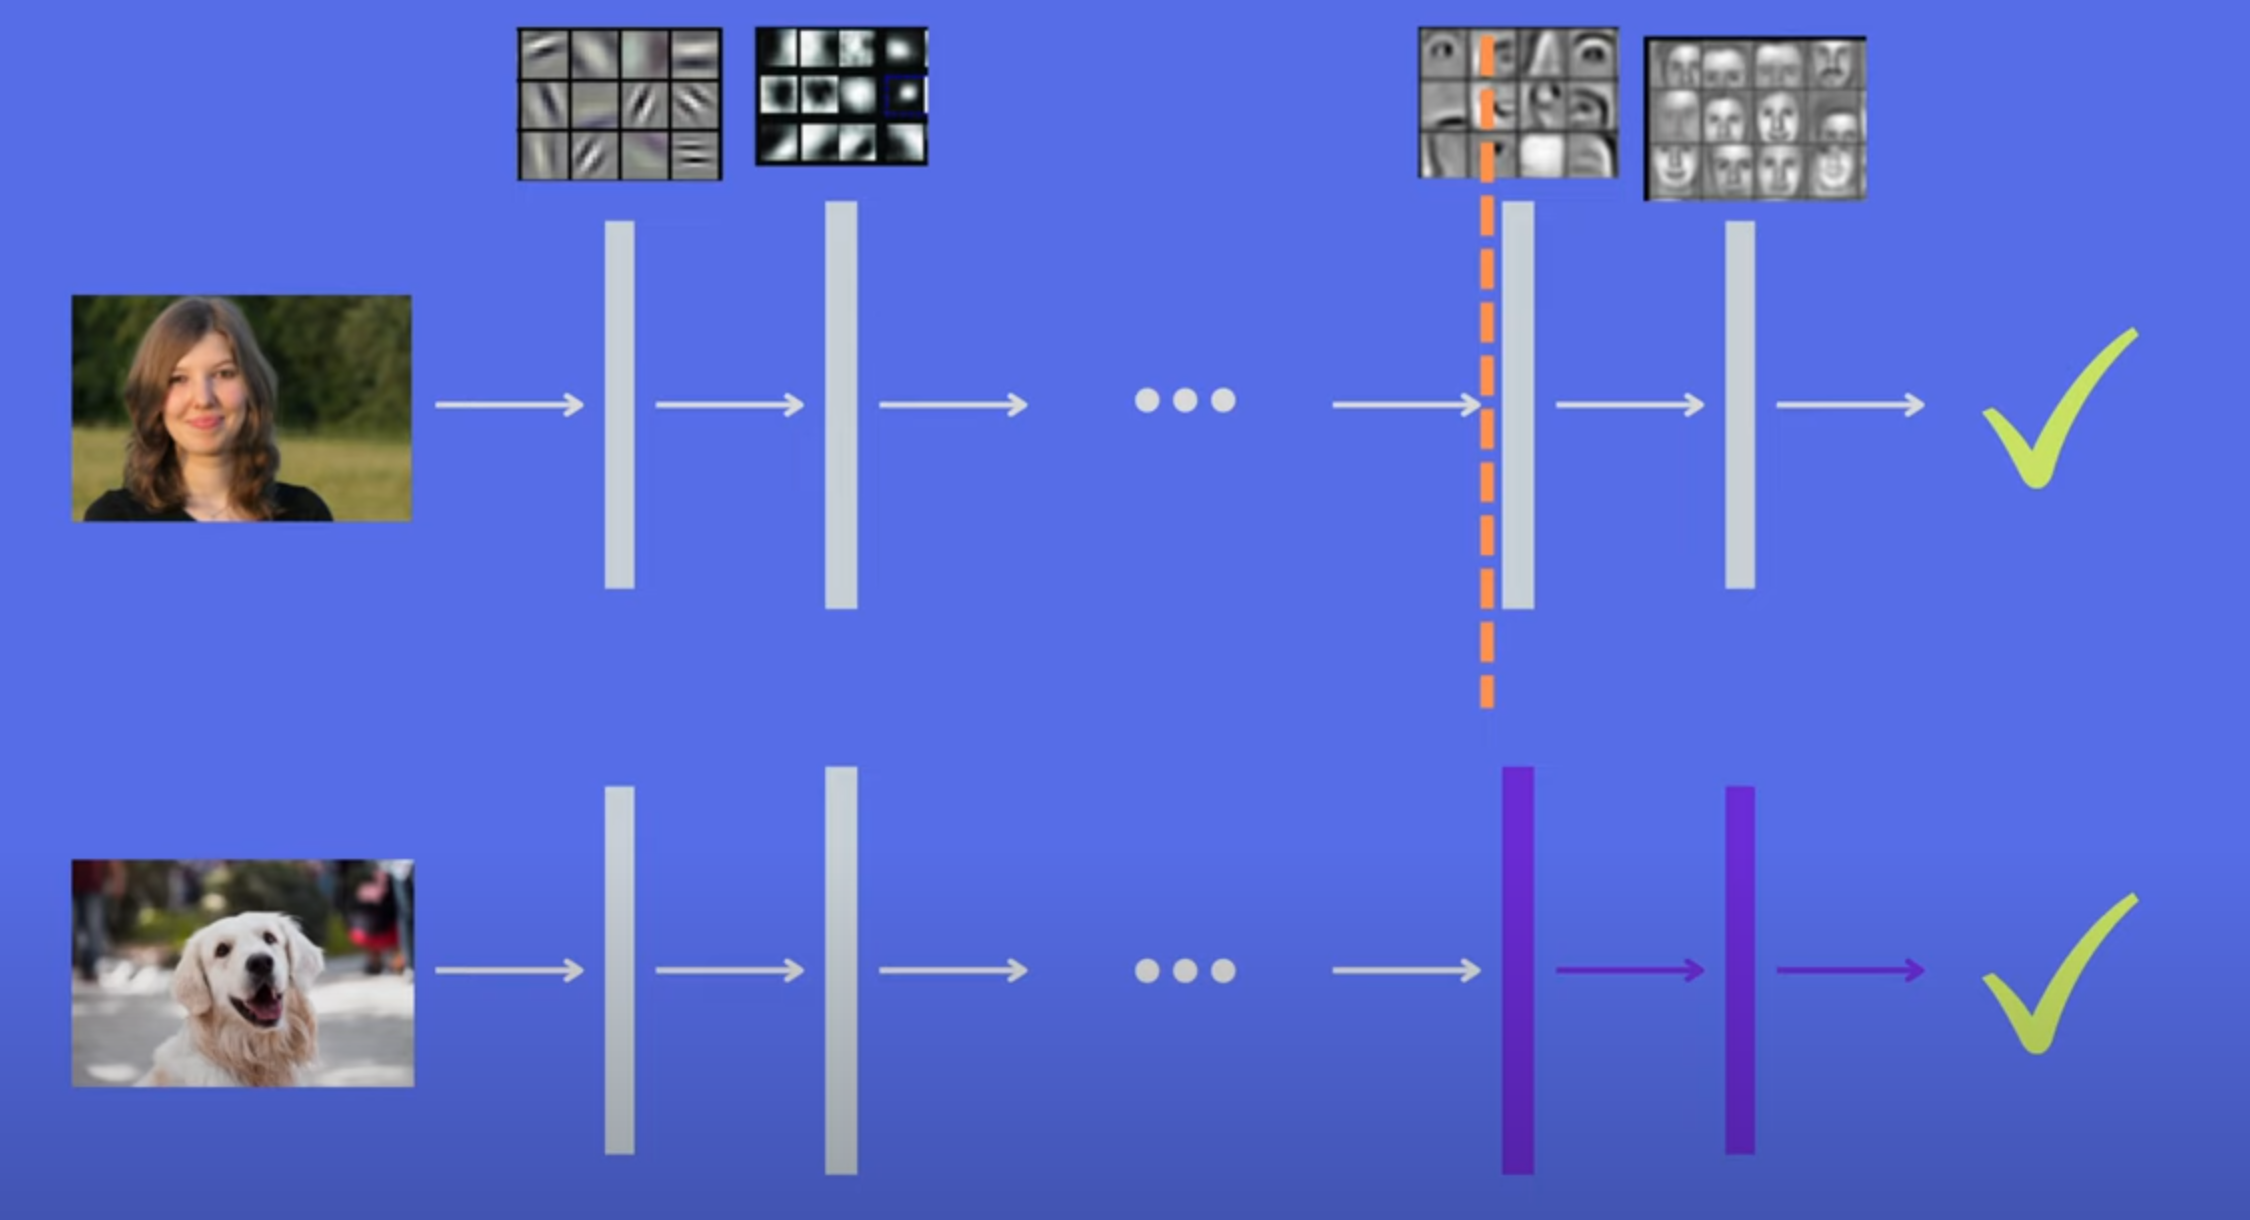

In [ ]:
Image(filename='/content/drive/MyDrive/AI-Project1/Transfer.png',width=500,height=300)

We are using xception model which is trained on ImageNet dataset.
As we know this dataset are based on objects and animals mostly so finding flower types would be something diffrent.

1: imports

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

2: loading data

In [ ]:
dataset, info = tfds.load("tf_flowers",
                          as_supervised=True,
                          with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info. features["label"].num_classes

3: splitting data. we are using only 10 percent of the data so we can have a small dataset.

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load("tf_flowers",
                        split=["train[:1%]",
                               "train[1%:2.5%]",
                               "train[2.5%:10%]"],
                        as_supervised=True)

4: preprocessing data

In [ ]:
def preprocess(image,label):
    resized_image = tf.image.resize(image, [224,224])
    final_image = tf.keras.applications.xception.preprocess_input(resized_image)
    return final_image, label


In [ ]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

5: defining model

In [ ]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                            include_top=False)


avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)


model = tf.keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

6: compile and fit

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2,
                                    momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])


history = model.fit(train_set,
                    epochs=5,
                    validation_data=valid_set)

Epoch 1/5
9/9 [==============================] - 101s 11s/step - loss: 3.3894 - accuracy: 0.4545 - val_loss: 2.3354 - val_accuracy: 0.7818
Epoch 2/5
9/9 [==============================] - 83s 9s/step - loss: 2.2616 - accuracy: 0.7673 - val_loss: 3.8239 - val_accuracy: 0.7455
Epoch 3/5
9/9 [==============================] - 78s 9s/step - loss: 0.7977 - accuracy: 0.9127 - val_loss: 2.7515 - val_accuracy: 0.7091
Epoch 4/5
9/9 [==============================] - 91s 11s/step - loss: 0.5384 - accuracy: 0.9200 - val_loss: 2.5974 - val_accuracy: 0.7818
Epoch 5/5
9/9 [==============================] - 83s 9s/step - loss: 0.1511 - accuracy: 0.9709 - val_loss: 2.6984 - val_accuracy: 0.8000


Now we do the same thing on the horses or humans dataset. We know our model is fimiliar with detecting animals so it should be an easy job.

In [ ]:
dataset, info = tfds.load('horses_or_humans',
                          as_supervised=True,
                          with_info=True)

In [ ]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info. features["label"].num_classes

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load('horses_or_humans',
                        split=["train[:1%]",
                               "train[1%:2.5%]",
                               "train[2.5%:10%]"],
                        as_supervised=True)

In [ ]:
def preprocess(image,label):
    resized_image = tf.image.resize(image, [224,224])
    final_image = tf.keras.applications.xception.preprocess_input(resized_image)
    return final_image, label


In [ ]:
batch_size = 32
train_set = train_set_raw.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [ ]:
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                            include_top=False)


avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)


model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2,
                                    momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])


history = model.fit(train_set,
                    epochs=5,
                    validation_data=valid_set)

Epoch 1/5
3/3 [==============================] - 45s 11s/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 2/5
3/3 [==============================] - 23s 7s/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/5
3/3 [==============================] - 21s 7s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/5
3/3 [==============================] - 23s 8s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 27s 9s/step - loss: 6.5094e-04 - accuracy: 1.0000 - val_loss: 7.1289e-04 - val_accuracy: 1.0000
